# Nonlinear computations in spiking neural networks through multiplicative synapses - Figure 1
Michele Nardin, James W Phillips, William F Podlaski, Sander W Keemink

We will here reproduce the main figures from the paper.

### Imports

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 10})

### Plot settings

In [2]:
matplotlib.rcParams['figure.dpi'] = 90

# Figure 1

#### Basic network settings

In [3]:
# common parameters
# Time = 20 # total time
Time = 7 # total time
dt = 0.001
times = np.arange(0, Time, dt)
Nt=len(times)

# dimensionality of input
K = 3

N = 18 # neurons, 6 per dimension
D = np.zeros([K,N])
for i in np.arange(K)*2:
    D[int(i/2),i*K:(i+1)*K] = -1
    D[int(i/2),(i+1)*K:(i+2)*K] = 1
D = D/10

T = np.diag(D.T@D)/2

#### Generating the input

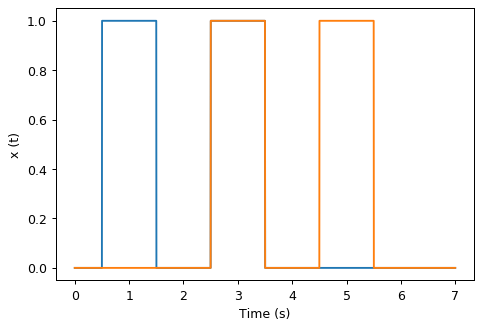

In [4]:
c1 = np.zeros(Nt)
c2 = np.zeros(Nt)

c1[500:1500] = 1
c1[2500:3500] = 1

c2[2500:3500] = 1
c2[4500:5500] = 1

plt.plot(times, c1)
plt.plot(times, c2)
plt.xlabel('Time (s)')
plt.ylabel('x (t)')
x = np.array([c1,c2,np.zeros_like(c1)])
Dx = np.gradient(x)[1]/dt

#### Simulate and plot linear dynamical system
$$\dot{z} = \frac{x+y}{2}$$

Simulate

In [5]:
# Setup connectivity for dynamics
A = np.array([[0]*3,
              [0]*3,
              [0.5,0.5,1]])

om_l = D.T@A@D

# Simulate through forward Euler
V = np.zeros([N,Nt+1])
s = np.zeros([N,Nt+1])
r = np.zeros([N,Nt+1])
r[:,0] = np.linalg.pinv(D)@x[:,0]

for t in range(Nt):
    V[:,t+1] = V[:,t] + dt*(-V[:,t] + D.T@(x[:,t]+Dx[:,t]) - D.T@D@s[:,t]+
                            om_l@r[:,t])
    above = np.where(V[:,t+1] > T)[0]
    # let only one neuron fire
    if len(above):
        s[np.random.choice(above),t+1] = 1/dt
    r[:,t+1] = r[:,t] + dt*(s[:,t+1] - r[:,t])
    
# Retreive readout
X = D@r

# get spike times
a=np.where(s)

Plot

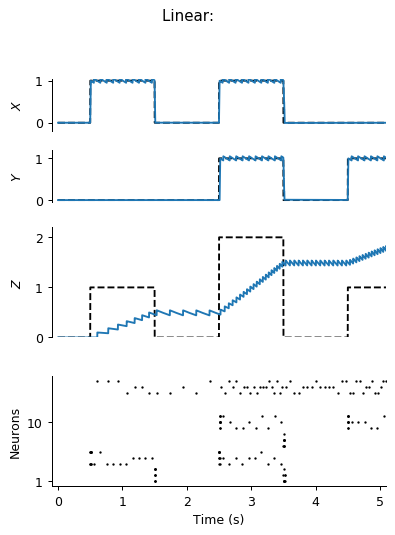

In [6]:
plt.figure(figsize=(4.8,6))

ax=plt.subplot(6,1,1)
[ax.spines[s].set_visible(False) for s in ['right','top','bottom']]
ax.xaxis.set_visible(False)

# input + representation?
plt.plot(x[0],'k',ls='dashed')
plt.plot(X[0])
plt.yticks([0,1],[0,1])
plt.ylim([-0.2,1.05])
plt.ylabel('$X$',labelpad=9)

plt.xlim([-100,5100])


ax=plt.subplot(6,1,2)
[ax.spines[s].set_visible(False) for s in ['right','top','bottom']]

ax.xaxis.set_visible(False)

# input + representation?
plt.plot(x[1],'k',ls='dashed')
plt.plot(X[1])
plt.xlim([-100,5100])
plt.ylim([-0.05,1.21])
plt.yticks([0,1],[0,1])

plt.ylabel('$Y$',labelpad=9)



ax = plt.subplot(3,1,2)
[ax.spines[s].set_visible(False) for s in ['right','top','bottom']]

ax.xaxis.set_visible(False)
plt.plot(x[0]+x[1],'k',ls='dashed')
plt.plot(X[2])

plt.xlim([-100,5100])
plt.ylim([0,2.2])
plt.ylabel('$Z$',labelpad=9)

ax = plt.subplot(3,1,3)

plt.scatter(a[1],a[0],marker='.',s = 3,color='k',alpha=1)
plt.xlim([-100,5100])
[ax.spines[s].set_visible(False) for s in ['right','top']]
plt.ylabel('Neurons')
plt.yticks([0,10],[1,10])

plt.xticks(np.arange(6)*1000,np.arange(6))
plt.xlabel('Time (s)')
plt.suptitle('Linear:           ',fontsize='large',y=1.01)

plt.subplots_adjust(hspace=0.35)



#### Simulate and plot linear dynamical system
$$\dot{z} = xy$$

Simulate

In [7]:
# Setup connectivity for dynamics
B = np.array([[0]*9,
              [0]*9,
              [0,1]+[0]*7])

om_nl = D.T@B@np.kron(D,D)
# integrate only in z!
I = np.zeros([3,3])
I[2,2]=1
om_l = D.T@(I)@D

# Voltage, spikes, rate
V = np.zeros([N,Nt+1])
s = np.zeros([N,Nt+1])
r = np.zeros([N,Nt+1])
r[:,0] = np.linalg.pinv(D)@x[:,0]

for t in range(Nt):
    V[:,t+1] = V[:,t] + dt*(-V[:,t] + D.T@(x[:,t]+Dx[:,t]) - D.T@D@s[:,t]+
                            om_l@r[:,t]+
                            om_nl@np.kron(r[:,t],r[:,t]))
    above = np.where(V[:,t+1] > T)[0]
    # let only one neuron fire
    if len(above):
        s[np.random.choice(above),t+1] = 1/dt
    r[:,t+1] = r[:,t] + dt*(s[:,t+1] - r[:,t])
    
# Retreive readout
X = D@r

# get spike times
a=np.where(s)

Plot

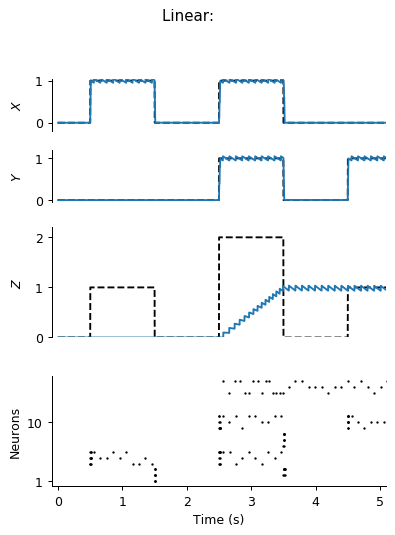

In [8]:
plt.figure(figsize=(4.8,6))

ax=plt.subplot(6,1,1)
[ax.spines[s].set_visible(False) for s in ['right','top','bottom']]
ax.xaxis.set_visible(False)

# input + representation?
plt.plot(x[0],'k',ls='dashed')
plt.plot(X[0])
plt.yticks([0,1],[0,1])
plt.ylim([-0.2,1.05])
plt.ylabel('$X$',labelpad=9)

plt.xlim([-100,5100])


ax=plt.subplot(6,1,2)
[ax.spines[s].set_visible(False) for s in ['right','top','bottom']]

ax.xaxis.set_visible(False)

# input + representation?
plt.plot(x[1],'k',ls='dashed')
plt.plot(X[1])
plt.xlim([-100,5100])
plt.ylim([-0.05,1.21])
plt.yticks([0,1],[0,1])

plt.ylabel('$Y$',labelpad=9)



ax = plt.subplot(3,1,2)
[ax.spines[s].set_visible(False) for s in ['right','top','bottom']]

ax.xaxis.set_visible(False)
plt.plot(x[0]+x[1],'k',ls='dashed')
plt.plot(X[2])

plt.xlim([-100,5100])
plt.ylim([0,2.2])
plt.ylabel('$Z$',labelpad=9)

ax = plt.subplot(3,1,3)

plt.scatter(a[1],a[0],marker='.',s = 3,color='k',alpha=1)
plt.xlim([-100,5100])
[ax.spines[s].set_visible(False) for s in ['right','top']]
plt.ylabel('Neurons')
plt.yticks([0,10],[1,10])

plt.xticks(np.arange(6)*1000,np.arange(6))
plt.xlabel('Time (s)')
plt.suptitle('Linear:           ',fontsize='large',y=1.01)

plt.subplots_adjust(hspace=0.35)

